# Graduate Salary Insights


**Activity:**

For this project I have selected 3 diffrent datasets which gives us salary information of individuals after completing their college. The data sets are as below.                                                            
i) salary by degree                                                                                              
ii) salary by type and college  
iii) salary by region

Source for data:- https://www.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Type-sort.html, https://www.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Region-sort.html, https://www.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html


My targetted audience for this project are the student for whom this analysis can be helpful in order to decide on the school and major to choose for a future with good financial returns.

We will first start with reading the data into the notebook and then performing exploratory data analysis on it. 

In [3]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(scales)
library(forcats)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [4]:
degree <- read_csv("./degrees-that-pay-back.csv",
                   col_names = c("major", "start_median_salary", "mid_career_salary",
                                 "percent_change", "mid_career_10th", "mid_career_25th",
                                 "mid_career_75th", "mid_career_90th"),
                   col_types = "cnndnnnn", skip = 1)

college <- read_csv("./salaries-by-college-type.csv",
                   col_names = c("school_name", "school_type", "start_median_salary",
                                 "mid_career_salary", "mid_career_10th", "mid_career_25th",
                                 "mid_career_75th", "mid_career_90th"),
                   col_types = "ccnnnnnn", skip = 1)

region <- read_csv("./salaries-by-region.csv",
                   col_names = c("school_name", "region", "start_median_salary",
                                 "mid_career_salary", "mid_career_10th", "mid_career_25th",
                                 "mid_career_75th", "mid_career_90th"),
                   col_types = "ccnnnnnn", skip = 1)

Warning message:
“76 parsing failures.
row             col expected actual                             file
  2 mid_career_10th a number    N/A './salaries-by-college-type.csv'
  2 mid_career_90th a number    N/A './salaries-by-college-type.csv'
  3 mid_career_10th a number    N/A './salaries-by-college-type.csv'
  3 mid_career_90th a number    N/A './salaries-by-college-type.csv'
  5 mid_career_10th a number    N/A './salaries-by-college-type.csv'
... ............... ........ ...... ................................
See problems(...) for more details.
”Warning message:
“94 parsing failures.
row             col expected actual                       file
  2 mid_career_10th a number    N/A './salaries-by-region.csv'
  2 mid_career_90th a number    N/A './salaries-by-region.csv'
  3 mid_career_10th a number    N/A './salaries-by-region.csv'
  3 mid_career_90th a number    N/A './salaries-by-region.csv'
  5 mid_career_10th a number    N/A './salaries-by-region.csv'
... ............... ....

In [5]:

head(degree)
head(college)
head(region)



major,start_median_salary,mid_career_salary,percent_change,mid_career_10th,mid_career_25th,mid_career_75th,mid_career_90th
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accounting,46000,77100,67.6,42200,56100,108000,152000
Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000
Agriculture,42600,71900,68.8,36300,52100,96300,150000
Anthropology,36800,61500,67.1,33800,45500,89300,138000
Architecture,41600,76800,84.6,50600,62200,97000,136000
Art History,35800,64900,81.3,28800,42200,87400,125000


school_name,school_type,start_median_salary,mid_career_salary,mid_career_10th,mid_career_25th,mid_career_75th,mid_career_90th
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Massachusetts Institute of Technology (MIT),Engineering,72200,126000,76800,99200,168000,220000
California Institute of Technology (CIT),Engineering,75500,123000,NA,104000,161000,NA
Harvey Mudd College,Engineering,71800,122000,NA,96000,180000,NA
"Polytechnic University of New York, Brooklyn",Engineering,62400,114000,66800,94300,143000,190000
Cooper Union,Engineering,62200,114000,NA,80200,142000,NA
Worcester Polytechnic Institute (WPI),Engineering,61000,114000,80000,91200,137000,180000


school_name,region,start_median_salary,mid_career_salary,mid_career_10th,mid_career_25th,mid_career_75th,mid_career_90th
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Stanford University,California,70400,129000,68400,93100,184000,257000
California Institute of Technology (CIT),California,75500,123000,NA,104000,161000,NA
Harvey Mudd College,California,71800,122000,NA,96000,180000,NA
"University of California, Berkeley",California,59900,112000,59500,81000,149000,201000
Occidental College,California,51900,105000,NA,54800,157000,NA
Cal Poly San Luis Obispo,California,57200,101000,55000,74700,133000,178000


We will have a brief look at all the dataset. 


In [6]:
glimpse(degree)
glimpse(college)
glimpse(region)

Observations: 50
Variables: 8
$ major               <chr> "Accounting", "Aerospace Engineering", "Agricultu…
$ start_median_salary <dbl> 46000, 57700, 42600, 36800, 41600, 35800, 38800, …
$ mid_career_salary   <dbl> 77100, 101000, 71900, 61500, 76800, 64900, 64800,…
$ percent_change      <dbl> 67.6, 75.0, 68.8, 67.1, 84.6, 81.3, 67.0, 67.7, 6…
$ mid_career_10th     <dbl> 42200, 64300, 36300, 33800, 50600, 28800, 36900, …
$ mid_career_25th     <dbl> 56100, 82100, 52100, 45500, 62200, 42200, 47400, …
$ mid_career_75th     <dbl> 108000, 127000, 96300, 89300, 97000, 87400, 94500…
$ mid_career_90th     <dbl> 152000, 161000, 150000, 138000, 136000, 125000, 1…
Observations: 269
Variables: 8
$ school_name         <chr> "Massachusetts Institute of Technology (MIT)", "C…
$ school_type         <chr> "Engineering", "Engineering", "Engineering", "Eng…
$ start_median_salary <dbl> 72200, 75500, 71800, 62400, 62200, 61000, 61800, …
$ mid_career_salary   <dbl> 126000, 123000, 122000, 114000, 114000, 11

We will check if we have multiple entries for same college name in both the college and region data set.

In [7]:
college %>%
  group_by(school_name) %>%
  mutate(count = n()) %>%
  filter(count > 1) %>%
  summarise(Types = str_c(school_type, collapse = '-'))

school_name,Types
<chr>,<chr>
Arizona State University (ASU),Party-State
Florida State University (FSU),Party-State
"Indiana University (IU), Bloomington",Party-State
Louisiana State University (LSU),Party-State
Ohio University,Party-State
Pennsylvania State University (PSU),Party-State
Randolph-Macon College,Party-Liberal Arts
State University of New York (SUNY) at Albany,Party-State
"University of Alabama, Tuscaloosa",Party-State


We can see that there are 20 colleges in the college by type dataset having more than one college type. Let's check this for the region by dataset 

In [8]:
region %>%
  group_by(school_name) %>%
  mutate(count = n()) %>%
  filter(count > 1)

school_name,region,start_median_salary,mid_career_salary,mid_career_10th,mid_career_25th,mid_career_75th,mid_career_90th,count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>


We don't have any colleges listed with multiple regions. College by region has the most unique values for college also it has max observations of all the dataset. We can use this dataset to analyse if there is any relation between the salary features of the datasets 

We will start plotting the visulization for Starting and Mid-carrier Salaries. 

# Distribution of Starting Salary and Mid-Career Salary

We will now take a look at the distribution of Starting Salary and Mid-Career Salary 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


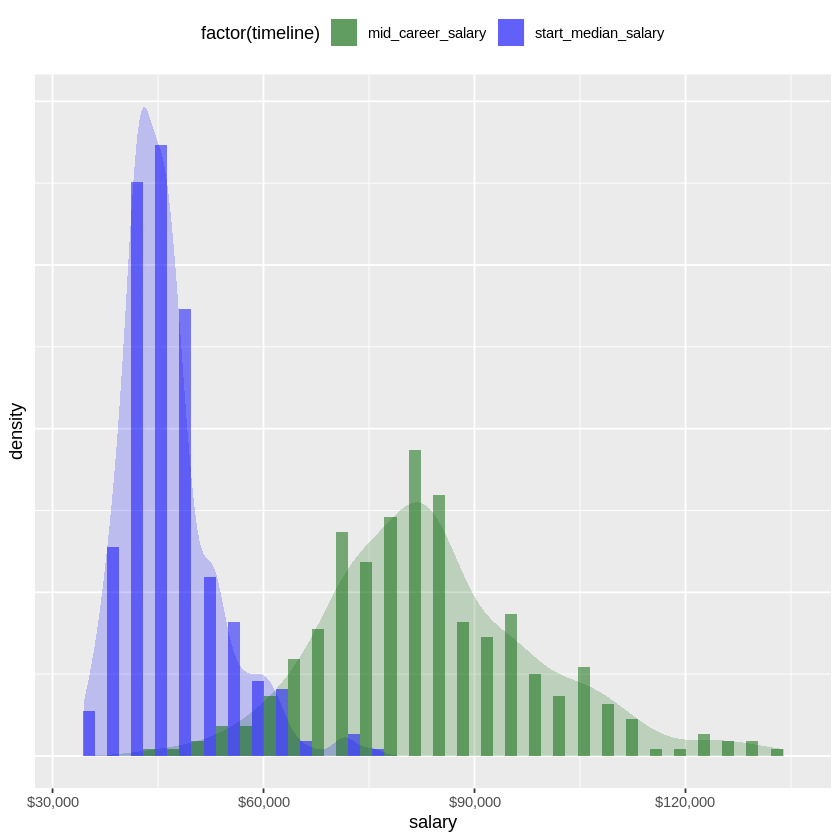

In [9]:

start_vs_med <- region %>%
  select(start_median_salary, mid_career_salary) %>%
  gather(timeline, salary)


ggplot(start_vs_med, aes(salary, fill = factor(timeline))) +
  geom_density(alpha = 0.2, color = NA) +
  geom_histogram(aes(y = ..density..), alpha = 0.5, position = 'dodge') +
  scale_fill_manual(values = c('darkgreen', 'blue')) +
  scale_x_continuous(labels = dollar) +
  theme(legend.position = "top",
        axis.text.y = element_blank(), axis.ticks.y = element_blank())

The median starting salary is concentrated at the lower range of salaries. Graduates of most colleges have a median which is in the range from 40,000 to 50,000 dollors , however the maximum staring salary is around 70,000 dollors. The distribution for mid career salary is more scattered than the starting salary, with median around 80,000 dollors.


# Salaries gained by degrees

We will now plot the graph of Starting Salary and Mid-career salaries with respect to the Degrees earned


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



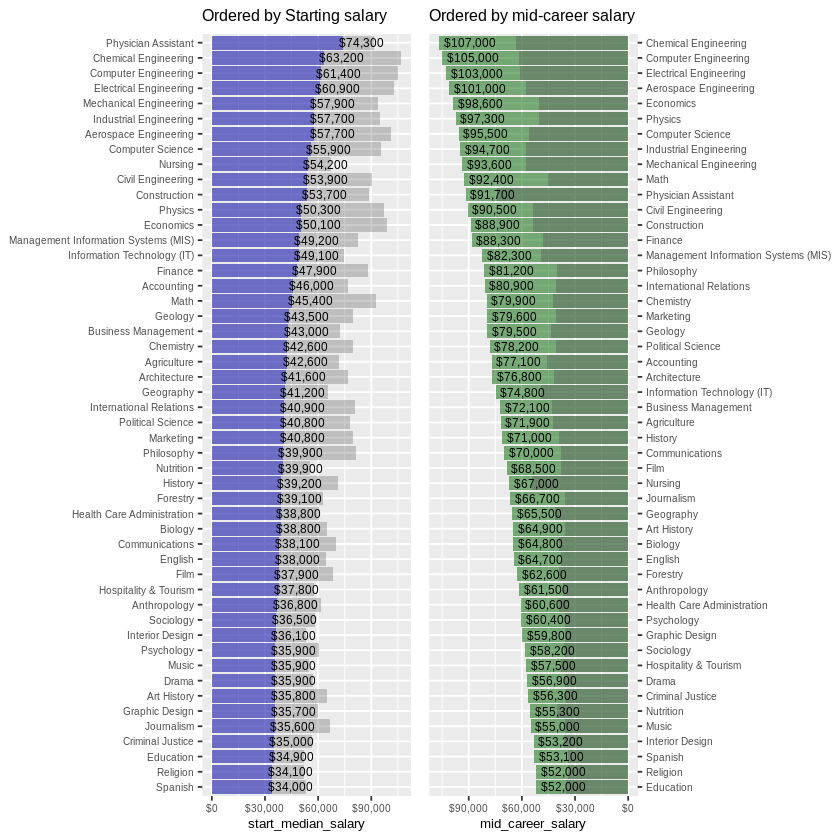

In [10]:
p1 <- ggplot(degree, aes(x = reorder(major, start_median_salary), start_median_salary)) +
  geom_col(fill = "blue", alpha = 0.5) +
  geom_col(aes(x = reorder(major, mid_career_salary), mid_career_salary), alpha = 0.3) +
  geom_text(aes(label = dollar(start_median_salary)), size = 2.5, hjust = 0.1) +
  scale_y_continuous(labels = dollar) +
  xlab(NULL) +
  coord_flip() + theme(axis.text.x = element_text(size = 6)) + theme(axis.text.y = element_text(size = 6)) +
  ggtitle("Ordered by Starting salary") + theme(text = element_text(size = 8))

p2 <- ggplot(degree, aes(x = reorder(major, mid_career_salary), mid_career_salary)) +
  geom_col(alpha = 0.5, fill = 'darkgreen') +
  geom_col(aes(x = reorder(major, mid_career_salary), start_median_salary), alpha = 0.4) +
  geom_text(aes(label = dollar(mid_career_salary)), size = 2.5, hjust = -0.1) +
  scale_fill_manual(values = c('blue', 'darkgreen')) +
  scale_y_reverse(labels = dollar) +
  scale_x_discrete(position = 'top') +
  xlab(NULL) +
  coord_flip() + theme(axis.text.x = element_text(size = 6)) + theme(axis.text.y = element_text(size = 6)) +
  ggtitle("Ordered by mid-career salary") + theme(text = element_text(size = 8))

library(gridExtra)
grid.arrange(p1, p2, nrow = 1, ncol = 2)

In the above plot we can see the comparision in grey color. The grey shade in the right plot is for the median starting salary and in the left one it is for the mid career salary. 
Engineering field has the highest median starting and the mid-career salary and also the physical assistant job has the highest starting salary but if you see the mid-career salary it is not the high. 

Let's plot the the graph for percent change with respect to majors to see how the salary changes we proceed in the career. 


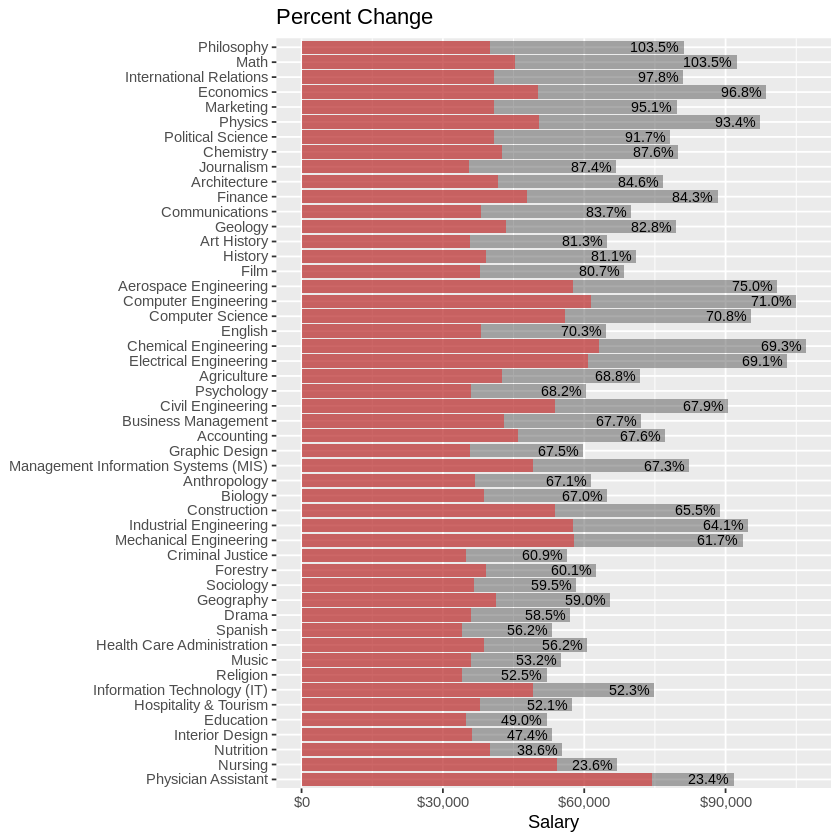

In [11]:
ggplot(degree, aes(x = reorder(major, percent_change), mid_career_salary)) +
  geom_col(alpha = 0.5) +
  geom_col(aes(x = reorder(major, percent_change), start_median_salary), fill = 'red', alpha = 0.4) +
  geom_text(aes(label = percent(percent_change / 100)), size = 3, hjust = 1.1) +
  scale_y_continuous(labels = dollar) +
  xlab(NULL) +
  ylab('Salary') +
  coord_flip() +
  ggtitle("Percent Change")


There is a huge growth in the field of maths and philosphy while the lowest growth for Physical assistants. Engineering careers choices have slipped from the top most position when we look at the growth in salary with experience.  

# Salary with respect to College Type 

Let's plot a bar garph with respcet to college type

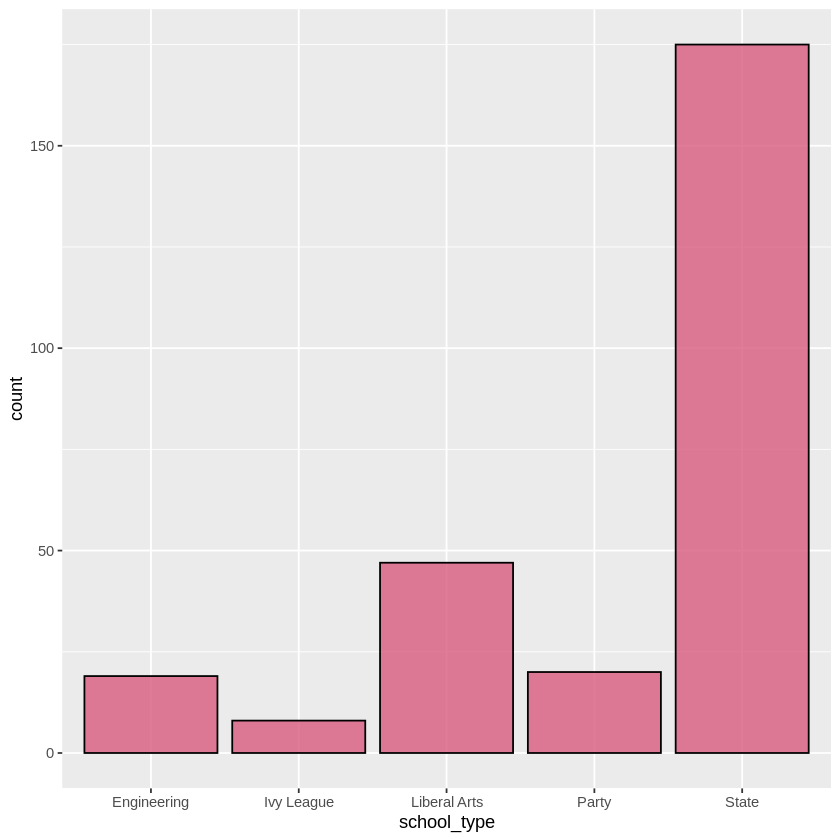

In [12]:
ggplot(college, aes(school_type)) +
  geom_bar(color = 'black', fill = '#D85A7FFF', alpha = 0.8)

Let's look at how the school type affects the starting and mid career salary range.

In [13]:
college_type_salary <- college %>%
  select(school_type, start_median_salary, mid_career_salary) %>%
  gather(timeline, salary, start_median_salary:mid_career_salary)
  

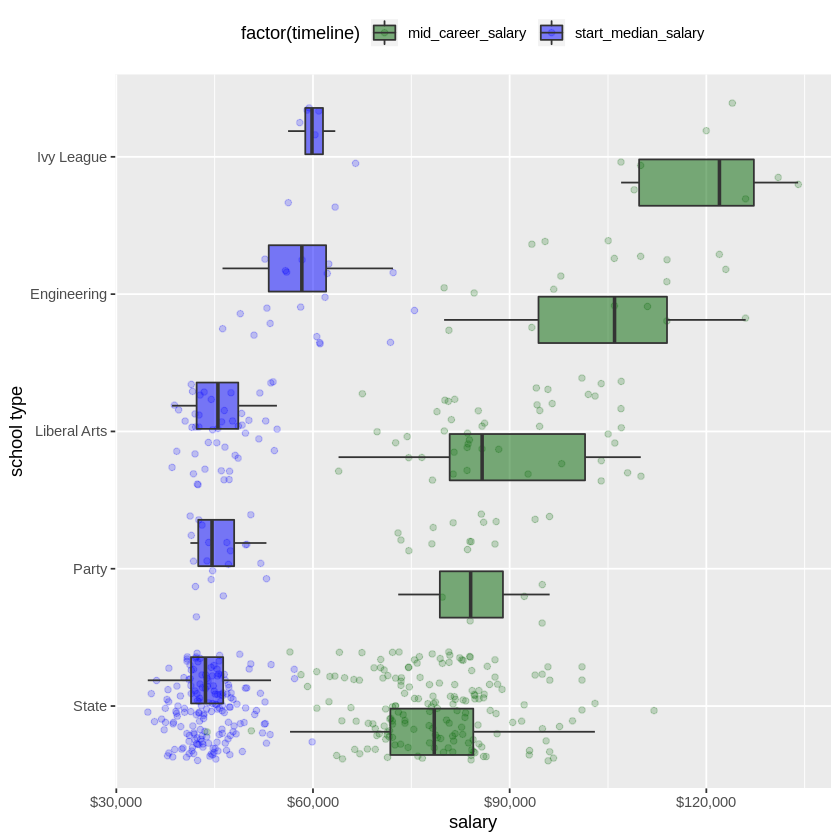

In [14]:
ggplot(college_type_salary, aes(reorder(school_type, salary), salary, fill = factor(timeline))) +
  geom_jitter(aes(color = factor(timeline)), alpha = 0.2) +
  scale_color_manual(values = c('darkgreen', 'blue')) +
  geom_boxplot(alpha = 0.5, outlier.color = NA) +
  scale_fill_manual(values = c('darkgreen', 'blue')) +
  scale_y_continuous(labels = dollar) +
  theme(legend.position = "top") +
  xlab('school type') +
  coord_flip()


This graphs shows us that the Engineering school and the Ivy league school have the highest salary in comparision to other schools. But if we focus just on the ivy league then we can prove that getting admission in an Ivy league college will surely help you earn good salary during mid-career. 

Let's look at the top 20 colleges with repect to mid career salary 

Selecting by mid_career_salary


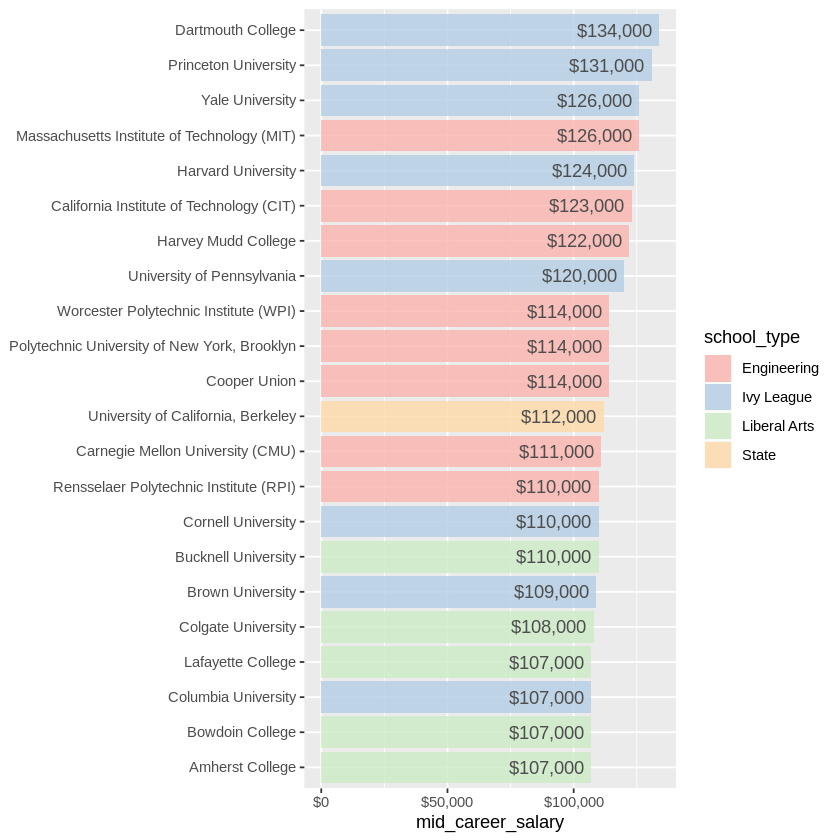

In [26]:
library(RColorBrewer)
accent_colors_edit <- brewer.pal(n = 5, "Pastel1")[c(1:3, 5)]  

df_col_top20 <- college %>%
  select(school_name, school_type, mid_career_salary) %>%
  arrange(desc(mid_career_salary)) %>%
  top_n(20)

p3 <- ggplot(df_col_top20, aes(reorder(school_name, mid_career_salary), mid_career_salary, fill = school_type)) +
      geom_col(alpha = 0.8) +
      scale_fill_manual(values = accent_colors_edit) +
      geom_text(aes(label = dollar(mid_career_salary)), hjust = 1.1, color = 'gray30') +
      scale_y_continuous(labels = dollar) +
      xlab(NULL) +
      coord_flip()
p3

# Salary by Region

The 3rd dataset is of salaries across regions so let's plot a distribution of salaries with respect to the region

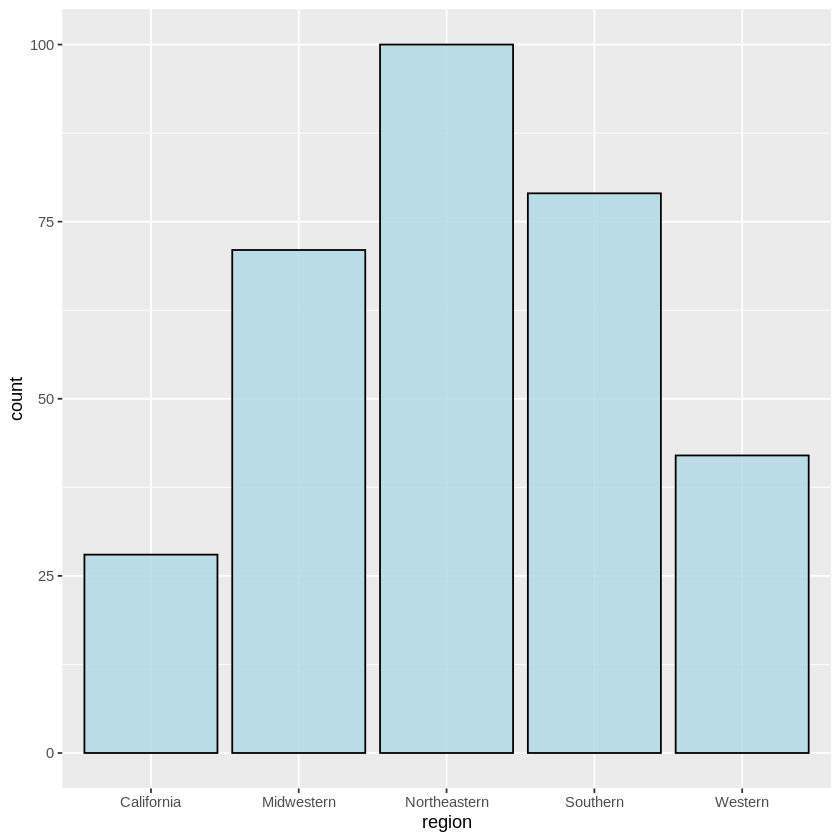

In [16]:
ggplot(region, aes(region)) +
  geom_bar(color = 'black', fill = 'lightblue', alpha = 0.8)

Let's plot a box plot to look at the staring and mid career salary by region

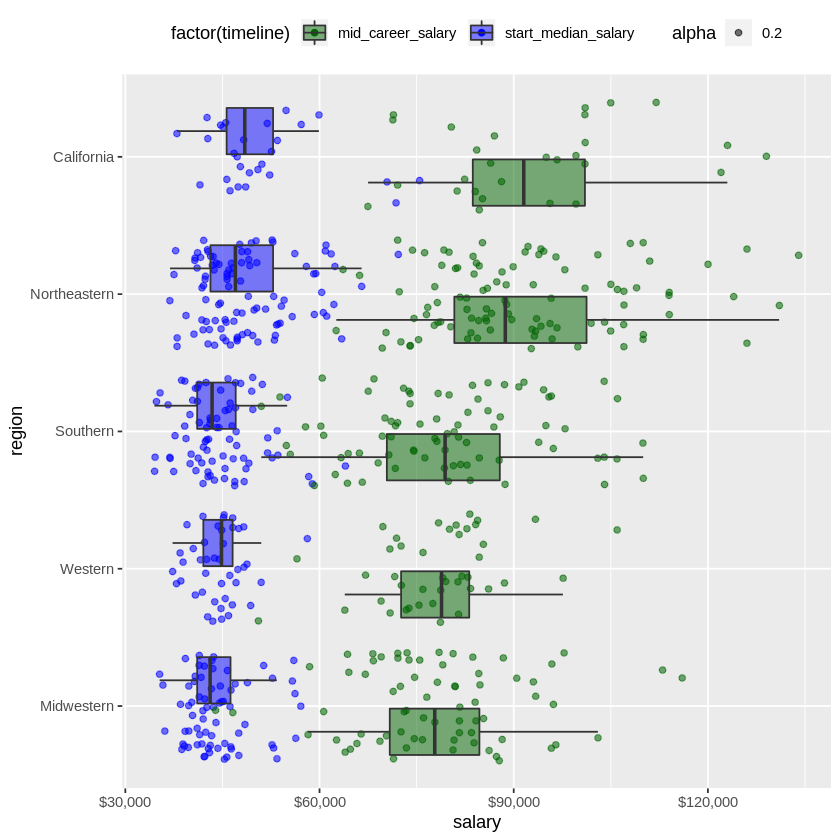

In [17]:
region_salary <- region %>%
  select(region, start_median_salary, mid_career_salary) %>%
  gather(timeline, salary, start_median_salary:mid_career_salary)

ggplot(region_salary, aes(reorder(region, salary), salary, fill = factor(timeline))) +
  geom_jitter(aes(color = factor(timeline), alpha = 0.2)) +
  scale_color_manual(values = c('darkgreen', 'blue')) +
  geom_boxplot(alpha = 0.5, outlier.color = NA) +
  scale_fill_manual(values = c('darkgreen', 'blue')) +
  scale_y_continuous(labels = dollar) +
  theme(legend.position = "top") +
  xlab('region') +
  coord_flip()

Let's plot the top 20 colleges list with respect to regiona and see is there is any diffrence between the two plots

Selecting by mid_career_salary


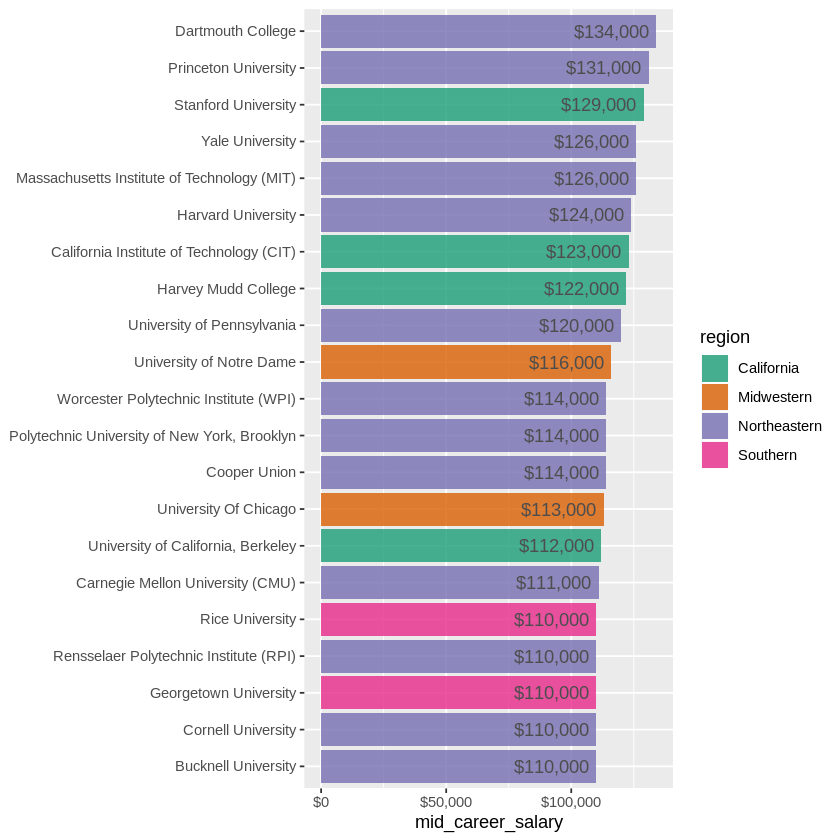

In [18]:
regionwise_top20 <- region %>%
  select(school_name, region, mid_career_salary) %>%
  arrange(desc(mid_career_salary)) %>%
  top_n(20)

p4 <- ggplot(regionwise_top20, aes(reorder(school_name, mid_career_salary), mid_career_salary, fill = region)) +
      geom_col(alpha = 0.8) +
      geom_text(aes(label = dollar(mid_career_salary)), hjust = 1.1, color = 'gray30') +
      scale_fill_brewer(palette = 'Dark2') +
      scale_y_continuous(labels = dollar) +
      xlab(NULL) +
      coord_flip()
p4

# Region and Type

Let look at the mean stating and mid-career salaries over region and the type of school 

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


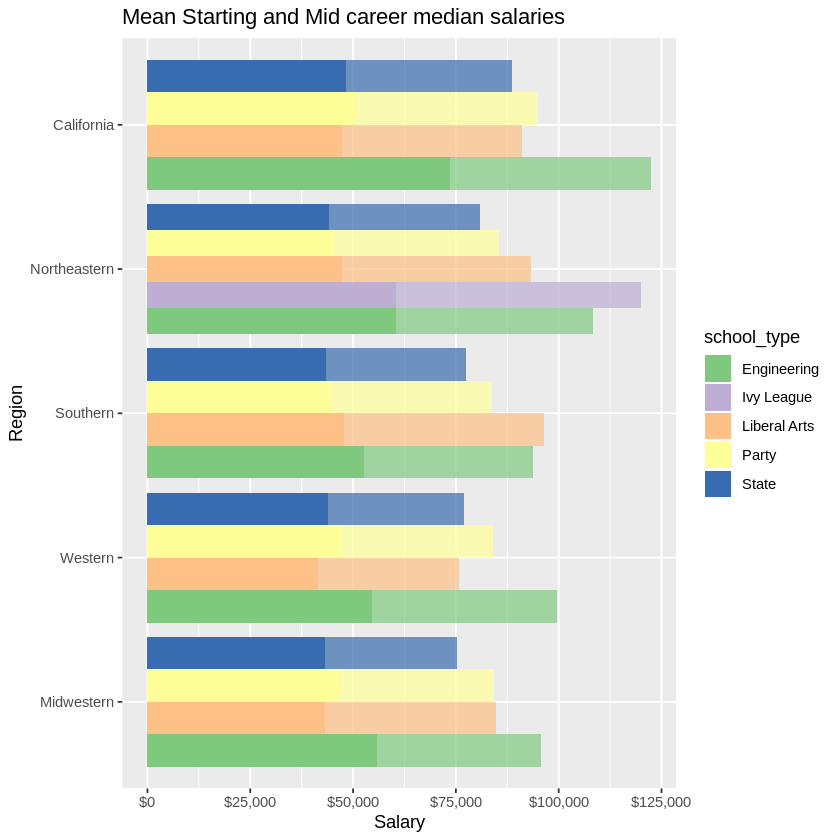

In [37]:

ggplot(region, aes(reorder(region, start_median_salary), mid_career_salary, fill = school_type)) +
  stat_summary(geom = 'col', position = 'dodge', alpha = 0.7) +
  stat_summary(aes(region, start_median_salary, fill = school_type),
               geom = 'col', position = 'dodge') +
  scale_fill_brewer(palette = 'Accent') +
  scale_y_continuous(labels = dollar) +
  xlab('Region') +
  ylab('Salary') +
  ggtitle('Mean Starting and Mid career median salaries') +
  coord_flip()

The darker shade is the Starting salaries whereas the ligher one is the mid career salaries. The enigneeing schools dominates almost in every region however it is almost same in north-eastern region, but for the mid career the ivy leage schools are more superior. In california the mid career salary for the engineering school is the highest. 
So, this analysis can help a student understant the pay scale depending on the school as well region which in turn can help them make a dicision on deciding the school and area of interest. 
